<a href="https://colab.research.google.com/github/DenisVasil/Keras_2023/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
fashion_mnist.load_data()

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = (fashion_mnist.load_data())

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000]/225.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
class_names[y_train[2]]

'Sneaker'

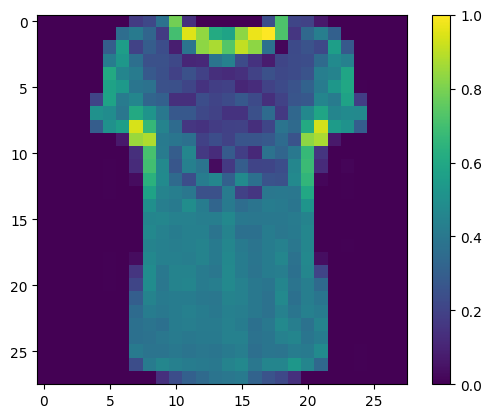

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics='accuracy')

In [20]:
history= model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7213 - accuracy: 0.7657 - val_loss: 0.5022 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4858 - accuracy: 0.8338 - val_loss: 0.4554 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4418 - accuracy: 0.8465 - val_loss: 0.4406 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4143 - accuracy: 0.8549 - val_loss: 0.3934 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3955 - accuracy: 0.8608 - val_loss: 0.3820 - val_accuracy: 0.8718
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3787 - accuracy: 0.8678 - val_loss: 0.3727 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3659 - accuracy: 0.8707 - val_loss: 0.3742 - val_accuracy

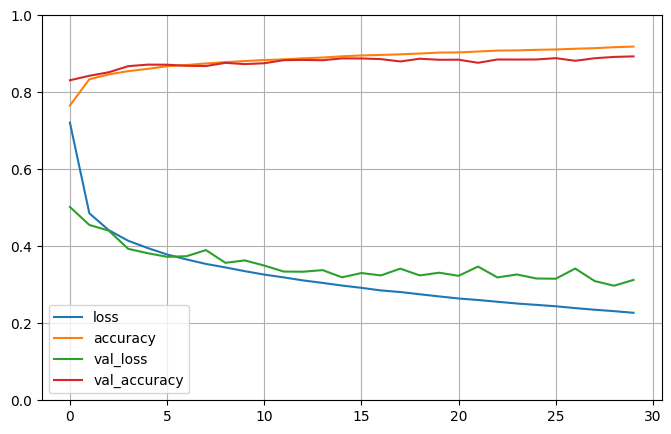

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 70.8119 - accuracy: 0.8461


[70.81190490722656, 0.8460999727249146]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 79ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
import  numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 18ms/step


array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_train.shape[1:])

(11610, 8)
(8,)


In [28]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",
                       input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
    ])

In [29]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [30]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7696 - val_loss: 0.5134
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7086 - val_loss: 0.4755
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4828 - val_loss: 0.4427
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4563 - val_loss: 0.4228
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3954 - val_loss: 0.4008
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3847 - val_loss: 0.3933
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3792 - val_loss: 0.3889
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3743 - val_loss: 0.3965
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3707 - val_loss: 0.3854
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3691 - val_loss: 0.3823

In [31]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3572


In [32]:
mse_test

0.357193261384964

In [33]:
X_new=X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 41ms/step


In [34]:
y_pred

array([[1.6681243],
       [1.2151215],
       [2.9660177]], dtype=float32)

In [35]:
y_new = y_test[:3]

In [36]:
y_new

array([1.465, 0.92 , 2.247])

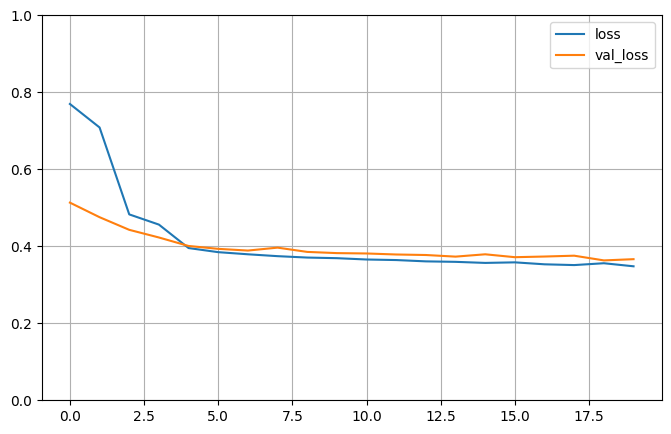

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [38]:
print(y_test)

[1.465 0.92  2.247 ... 1.214 4.116 1.353]
